In [42]:
import numpy as np
import pandas as pd 
import os
import tensorflow as tf
import matplotlib.pyplot as plt
import tensorflow_datasets as tdfs
from tensorflow.keras import Sequential
from tensorflow.keras.layers import InputLayer, Conv2D, MaxPool2D, BatchNormalization, Flatten, Dropout, Dense
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint
import cv2
import glob
import seaborn as sns

In [6]:
import kagglehub
path = kagglehub.dataset_download("marquis03/flower-classification")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/flower-classification


In [7]:
DATASET_PATH = "/kaggle/input/flower-classification/train"
IMG_SIZE = (128, 128)

# Load file paths and labels
files = glob.glob(DATASET_PATH + "/*/*")
np.random.shuffle(files)
labels = [os.path.basename(os.path.dirname(i)) for i in files]
data = pd.DataFrame(zip(files, labels), columns=["filename", "label"])

In [8]:
data = pd.read_csv('/kaggle/input/flower-classification/train.csv')
data.shape

(13642, 2)

In [9]:
df_train='/kaggle/input/flower-classification/train'
pd.DataFrame(os.listdir(df_train),columns=['Files_Name'])

,Files_Name
0,astilbe
1,black_eyed_susan
2,bellflower
3,classname.txt
4,common_daisy
5,coreopsis
6,dandelion
7,water_lily
8,carnation
9,calendula


In [10]:
df_test='/kaggle/input/flower-classification/val'
pd.DataFrame(os.listdir(df_test),columns=['Files_Name'])

,Files_Name
0,astilbe
1,black_eyed_susan
2,bellflower
3,classname.txt
4,common_daisy
5,coreopsis
6,dandelion
7,water_lily
8,carnation
9,calendula


In [11]:
files = [i for i in glob.glob(df_train + "//*//*")]
np.random.shuffle(files)
labels = [os.path.dirname(i).split("/")[-1] for i in files]
data = zip(files, labels)
dataframe = pd.DataFrame(data, columns = ["Image", "Label"])
dataframe

,Image,Label
0,/kaggle/input/flower-classification/train/wate...,water_lily
1,/kaggle/input/flower-classification/train/iris...,iris
2,/kaggle/input/flower-classification/train/asti...,astilbe
3,/kaggle/input/flower-classification/train/asti...,astilbe
4,/kaggle/input/flower-classification/train/carn...,carnation
...,...,...
13637,/kaggle/input/flower-classification/train/bell...,bellflower
13638,/kaggle/input/flower-classification/train/asti...,astilbe
13639,/kaggle/input/flower-classification/train/wate...,water_lily
13640,/kaggle/input/flower-classification/train/sunf...,sunflower


<Axes: xlabel='Label', ylabel='count'>

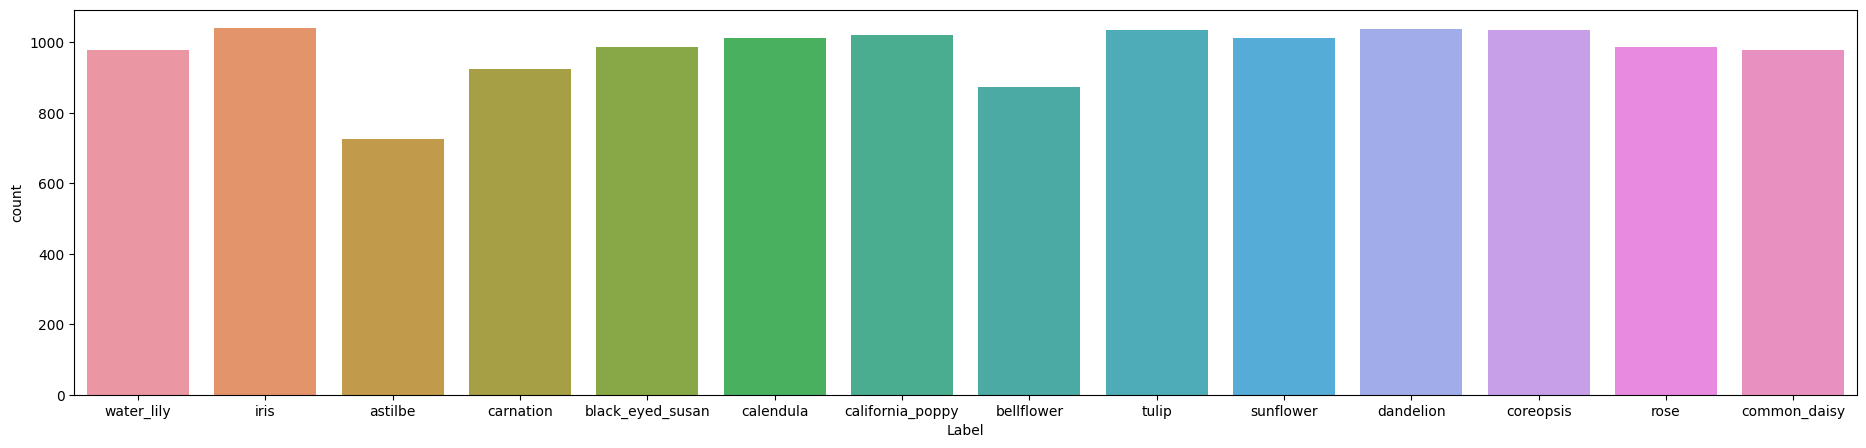

In [12]:
plt.figure(figsize=(23, 5))
sns.countplot(x=dataframe["Label"])

In [13]:
train_data_dir = '/kaggle/input/flower-classification/train'
batch_size = 32
target_size = (224, 224)
validation_split = 0.2
seed = 42

train = tf.keras.preprocessing.image_dataset_from_directory(
    train_data_dir,
    validation_split=validation_split,
    subset='training',
    seed=seed,
    image_size=target_size,
    batch_size=batch_size
)

val = tf.keras.preprocessing.image_dataset_from_directory(
    train_data_dir,
    validation_split=validation_split,
    subset='validation',
    seed=seed,
    image_size=target_size,
    batch_size=batch_size
)


Found 13642 files belonging to 14 classes.
Using 10914 files for training.


I0000 00:00:1746775710.347113      31 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13942 MB memory:  -> device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5
I0000 00:00:1746775710.347866      31 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 13942 MB memory:  -> device: 1, name: Tesla T4, pci bus id: 0000:00:05.0, compute capability: 7.5


Found 13642 files belonging to 14 classes.
Using 2728 files for validation.


In [14]:
cl_nm = train.class_names
cl_nm

['astilbe',
 'bellflower',
 'black_eyed_susan',
 'calendula',
 'california_poppy',
 'carnation',
 'common_daisy',
 'coreopsis',
 'dandelion',
 'iris',
 'rose',
 'sunflower',
 'tulip',
 'water_lily']

In [26]:
from tensorflow.keras import regularizers

model = tf.keras.Sequential([
    InputLayer(input_shape=(224, 224, 3)),

    Conv2D(filters=32, kernel_size=3, strides=1, padding='same', 
        activation='relu',kernel_regularizer=regularizers.l2(0.01) ),
    
    BatchNormalization(),
    MaxPool2D(pool_size=2),

    Conv2D(
        filters=64, 
        kernel_size=3, 
        strides=1, 
        padding='same', 
        activation='relu',
        kernel_regularizer=regularizers.l2(0.01) 
    ),
    BatchNormalization(),
    MaxPool2D(pool_size=2),

    Flatten(),
    Dropout(0.5),
    Dense(
        14, 
        activation='softmax',
        kernel_regularizer=regularizers.l2(0.01)  # L2 regularization
    )
])

model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 224, 224, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 224, 224, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 112, 112, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 112, 112, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 112, 112, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 56, 56, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 200704)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 200704)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 14)                  │       2,809,870 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,829,646 (10.79 MB)

 Trainable params: 2,829,454 (10.79 MB)

 Non-trainable params: 192 (768.00 B)

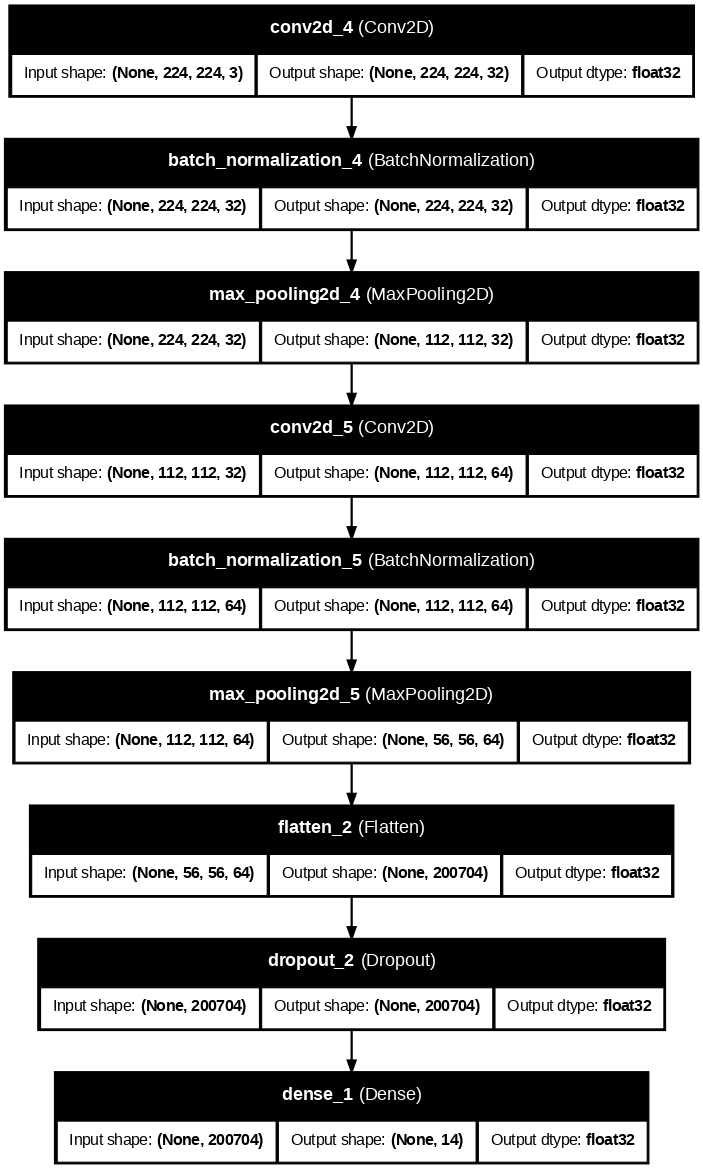

In [27]:
tf.keras.utils.plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True,show_dtype=True,dpi=80)

In [28]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',  
    metrics=['accuracy']
)


In [31]:
history=model.fit(train,validation_data=val,epochs=10, batch_size=32)

Epoch 1/10
342/342 ━━━━━━━━━━━━━━━━━━━━ 15s 44ms/step - accuracy: 0.8250 - loss: 4.2940 - val_accuracy: 0.5898 - val_loss: 5.8247
Epoch 2/10
342/342 ━━━━━━━━━━━━━━━━━━━━ 16s 45ms/step - accuracy: 0.8284 - loss: 4.1996 - val_accuracy: 0.5913 - val_loss: 5.4473
Epoch 3/10
342/342 ━━━━━━━━━━━━━━━━━━━━ 16s 46ms/step - accuracy: 0.8013 - loss: 4.3469 - val_accuracy: 0.5667 - val_loss: 5.3541
Epoch 4/10
342/342 ━━━━━━━━━━━━━━━━━━━━ 16s 45ms/step - accuracy: 0.8257 - loss: 3.9702 - val_accuracy: 0.5803 - val_loss: 5.0189
Epoch 5/10
342/342 ━━━━━━━━━━━━━━━━━━━━ 15s 44ms/step - accuracy: 0.8289 - loss: 3.7736 - val_accuracy: 0.5909 - val_loss: 4.9695
Epoch 6/10
342/342 ━━━━━━━━━━━━━━━━━━━━ 15s 44ms/step - accuracy: 0.8345 - loss: 3.6314 - val_accuracy: 0.5979 - val_loss: 4.8060
Epoch 7/10
342/342 ━━━━━━━━━━━━━━━━━━━━ 16s 45ms/step - accuracy: 0.8279 - loss: 3.5434 - val_accuracy: 0.5850 - val_loss: 4.4715
Epoch 8/10
342/342 ━━━━━━━━━━━━━━━━━━━━ 15s 45ms/step - accuracy: 0.8149 - loss: 3.4118 - 

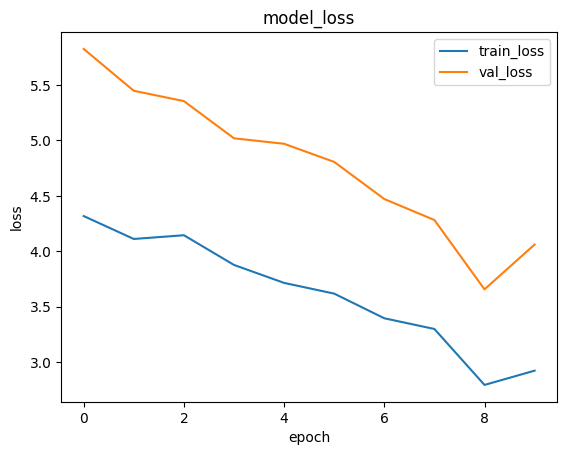

In [34]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model_loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train_loss', 'val_loss'])
plt.show()

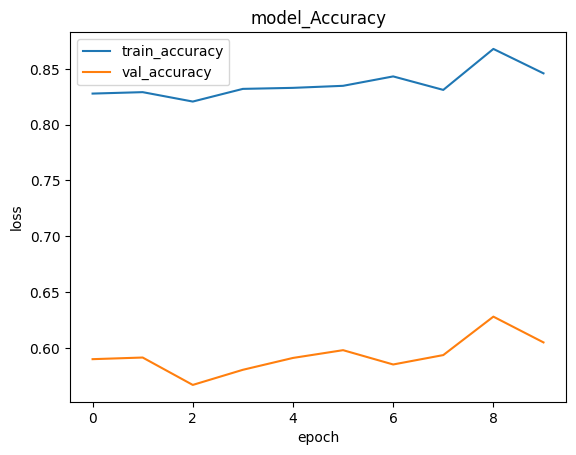

In [35]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model_Accuracy')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train_accuracy', 'val_accuracy'])
plt.show()

In [33]:
transfer_model = tf.keras.applications.MobileNetV3Large(input_shape=(224, 224, 3), include_top=False, weights='imagenet')
transfer_model.trainable = False
model2 = tf.keras.models.Sequential()
model2.add(transfer_model)
model2.add(tf.keras.layers.Flatten())
model2.add(tf.keras.layers.Dropout(0.5))
model2.add(tf.keras.layers.Dense(14, activation=tf.nn.softmax))
model2.summary()


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ MobileNetV3Large (Functional)        │ (None, 7, 7, 960)           │       2,996,352 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 47040)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 47040)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 14)                  │         658,574 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,654,926 (13.94 MB)

 Trainable params: 658,574 (2.51 MB)

 Non-trainable params: 2,996,352 (11.43 MB)

In [37]:
model2.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',  
    metrics=['accuracy']
)

In [38]:
history2=model2.fit(train,validation_data=val,epochs=10, batch_size=32)

Epoch 1/10
342/342 ━━━━━━━━━━━━━━━━━━━━ 36s 64ms/step - accuracy: 0.7239 - loss: 2.2966 - val_accuracy: 0.8684 - val_loss: 1.6583
Epoch 2/10
342/342 ━━━━━━━━━━━━━━━━━━━━ 9s 27ms/step - accuracy: 0.9366 - loss: 0.6562 - val_accuracy: 0.8776 - val_loss: 2.0760
Epoch 3/10
342/342 ━━━━━━━━━━━━━━━━━━━━ 10s 28ms/step - accuracy: 0.9643 - loss: 0.3521 - val_accuracy: 0.8915 - val_loss: 2.1041
Epoch 4/10
342/342 ━━━━━━━━━━━━━━━━━━━━ 10s 28ms/step - accuracy: 0.9695 - loss: 0.3278 - val_accuracy: 0.8823 - val_loss: 2.3302
Epoch 5/10
342/342 ━━━━━━━━━━━━━━━━━━━━ 10s 30ms/step - accuracy: 0.9686 - loss: 0.3799 - val_accuracy: 0.8897 - val_loss: 2.3171
Epoch 6/10
342/342 ━━━━━━━━━━━━━━━━━━━━ 9s 27ms/step - accuracy: 0.9741 - loss: 0.3295 - val_accuracy: 0.8805 - val_loss: 2.7251
Epoch 7/10
342/342 ━━━━━━━━━━━━━━━━━━━━ 10s 28ms/step - accuracy: 0.9814 - loss: 0.2568 - val_accuracy: 0.8952 - val_loss: 2.6858
Epoch 8/10
342/342 ━━━━━━━━━━━━━━━━━━━━ 9s 27ms/step - accuracy: 0.9817 - loss: 0.2104 - val

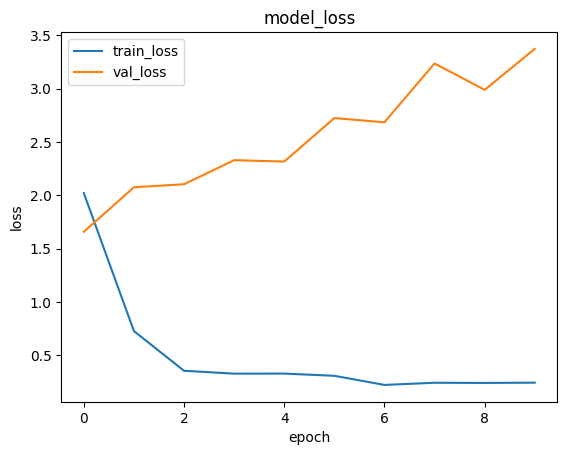

In [39]:
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('model_loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train_loss', 'val_loss'])
plt.show()

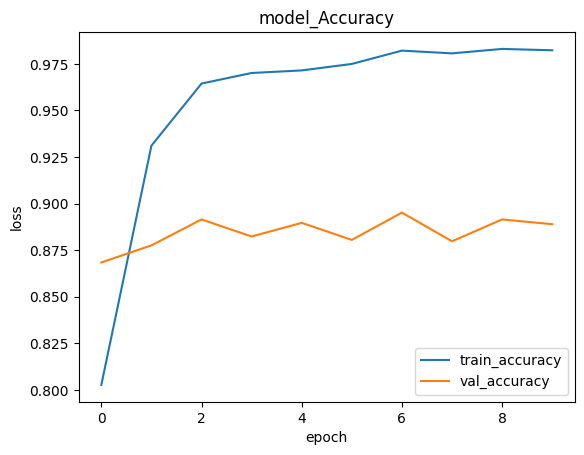

In [41]:
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('model_Accuracy')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train_accuracy', 'val_accuracy'])
plt.show()

In [47]:
pip install --upgrade scikit-image

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.8/14.8 MB 97.9 MB/s eta 0:00:00:00:010:01
  Attempting uninstall: scikit-image
    Found existing installation: scikit-image 0.25.1
    Uninstalling scikit-image-0.25.1:
      Successfully uninstalled scikit-image-0.25.1
Note: you may need to restart the kernel to use updated packages.
